<a href="https://colab.research.google.com/github/Jeremylaby/Practical_aspects_of_deep_learning/blob/main/Keras-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import keras

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Rozmiar obrazka (H, W): (28, 28)
Dtype: uint8 | min: 0 | max: 255


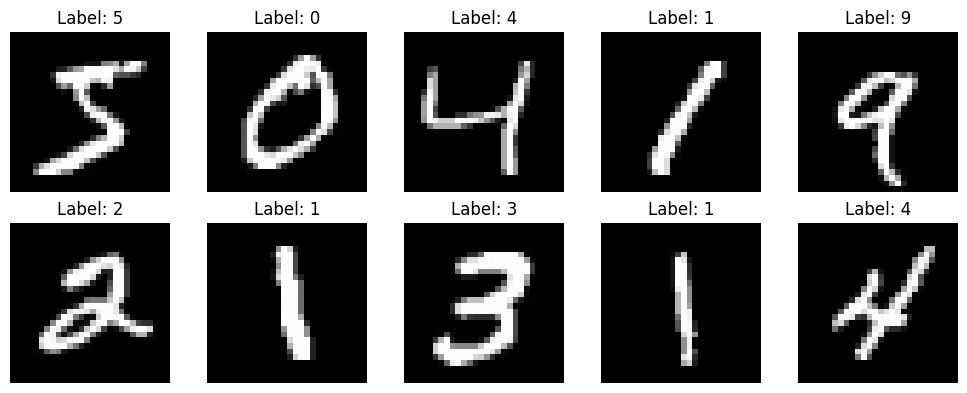

In [14]:

print("Rozmiar obrazka (H, W):", train_images.shape[1:])

print("Dtype:", train_images.dtype, "| min:", train_images.min(), "| max:", train_images.max())

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [15]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
x_train = train_images.reshape((60000, 28 * 28)).astype("float32")/250.0
x_test = test_images.reshape((10000, 28 * 28)).astype("float32")/250.0

In [19]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
network.fit(x_train, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8766 - loss: 0.4248
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9654 - loss: 0.1147
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9783 - loss: 0.0724
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9852 - loss: 0.0495
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9890 - loss: 0.0372


In [21]:
test_loss, test_acc = network.evaluate(x_test, test_labels)

print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9749 - loss: 0.0808
test_acc: 0.9782000184059143
